In [1]:
%matplotlib ipympl

In [28]:
import requests as rq
import csv
import pandas as pd
import numpy as np
import plotly.express as px
import os
import plotly.graph_objects as go

In [3]:
ny_times_timeseries_url = r'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'

# John's Hopkins
# https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/03-31-2020.csv # regular format

In [4]:
def read_remote_csv(url):
    # read csv from url
    response = rq.get(url)
    csv_reader = csv.reader(response.text.split('\n'), delimiter=',')
    header = next(csv_reader)

    csv_data = [row for row in csv_reader]
    return (header, csv_data)

def read_local_csv(file_path):
    # read csv from url
    with open(file_path,'rt') as file:
        csv_reader = csv.reader(file, delimiter=',')
        header = next(csv_reader)

        csv_data = [row for row in csv_reader]
        
    return (header, csv_data)

In [7]:
# # NY Times data
# header, csv_data = read_remote_csv(ny_times_timeseries_url)
# case_data = pd.DataFrame.from_records(data=csv_data,columns=header)
# case_data['date'] = pd.to_datetime(case_data['date'])
# case_data[['cases','deaths']] = case_data[['cases','deaths']].applymap(int)
# case_data.head()

In [8]:
# case_data.pivot_table(index='date', columns='state', values='cases', aggfunc=sum).plot.line(figsize=(15,15))


In [9]:
# cloned from https://github.com/CSSEGISandData/COVID-19

jh_path = r'../COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/03-31-2020.csv'

In [10]:
header, csv_data = read_local_csv(jh_path)

In [11]:
header

['FIPS',
 'Admin2',
 'Province_State',
 'Country_Region',
 'Last_Update',
 'Lat',
 'Long_',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'Combined_Key']

In [12]:
jh_data = pd.DataFrame.from_records(csv_data, columns=header)

In [13]:
jh_data[['Lat','Long_','Confirmed','Deaths','Recovered','Active']] = jh_data[['Lat','Long_','Confirmed','Deaths','Recovered','Active']].applymap(lambda x: float(x) if x != "" else np.nan)

In [14]:
us_data = jh_data.loc[jh_data['Country_Region']=='US',:]

In [15]:
us_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001,Abbeville,South Carolina,US,2020-03-31 23:43:56,34.223334,-82.461707,4.0,0.0,0.0,0.0,"Abbeville, South Carolina, US"
1,22001,Acadia,Louisiana,US,2020-03-31 23:43:56,30.295065,-92.414197,39.0,1.0,0.0,0.0,"Acadia, Louisiana, US"
2,51001,Accomack,Virginia,US,2020-03-31 23:43:56,37.767072,-75.632346,7.0,0.0,0.0,0.0,"Accomack, Virginia, US"
3,16001,Ada,Idaho,US,2020-03-31 23:43:56,43.452658,-116.241552,195.0,3.0,0.0,0.0,"Ada, Idaho, US"
4,19001,Adair,Iowa,US,2020-03-31 23:43:56,41.330756,-94.471059,1.0,0.0,0.0,0.0,"Adair, Iowa, US"


<class 'str'>


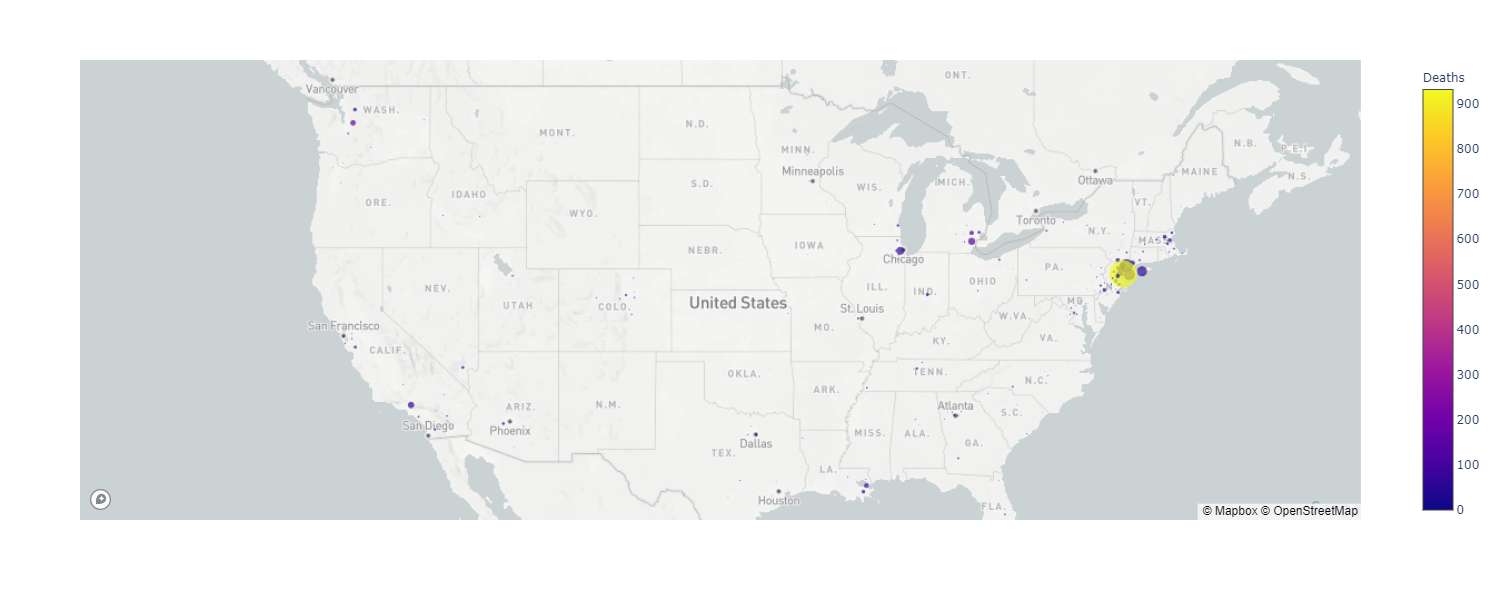

In [40]:
# Extract token
mapbox_token = os.getenv("MAPBOX_API_KEY")
print(type(mapbox_token))

# Set token using Plotly Express set function
px.set_mapbox_access_token(mapbox_token)

us_scatter_map_box = px.scatter_mapbox(
    us_data,
    lat="Lat",
    lon="Long_",
    size="Confirmed",
    color="Deaths",
    hover_name='Admin2',

)

fig = go.Figure(us_scatter_map_box
)

fig.update_layout(
    mapbox=dict(
        accesstoken=mapbox_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=40,
            lon=-99
        ),
        pitch=0,
        zoom=3.5
    )
)

In [25]:
nz_data = jh_data.loc[jh_data['Country_Region']=='New Zealand',:]
nz_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2375,,,,New Zealand,2020-03-31 23:43:43,-40.9006,174.886,647.0,1.0,74.0,572.0,New Zealand


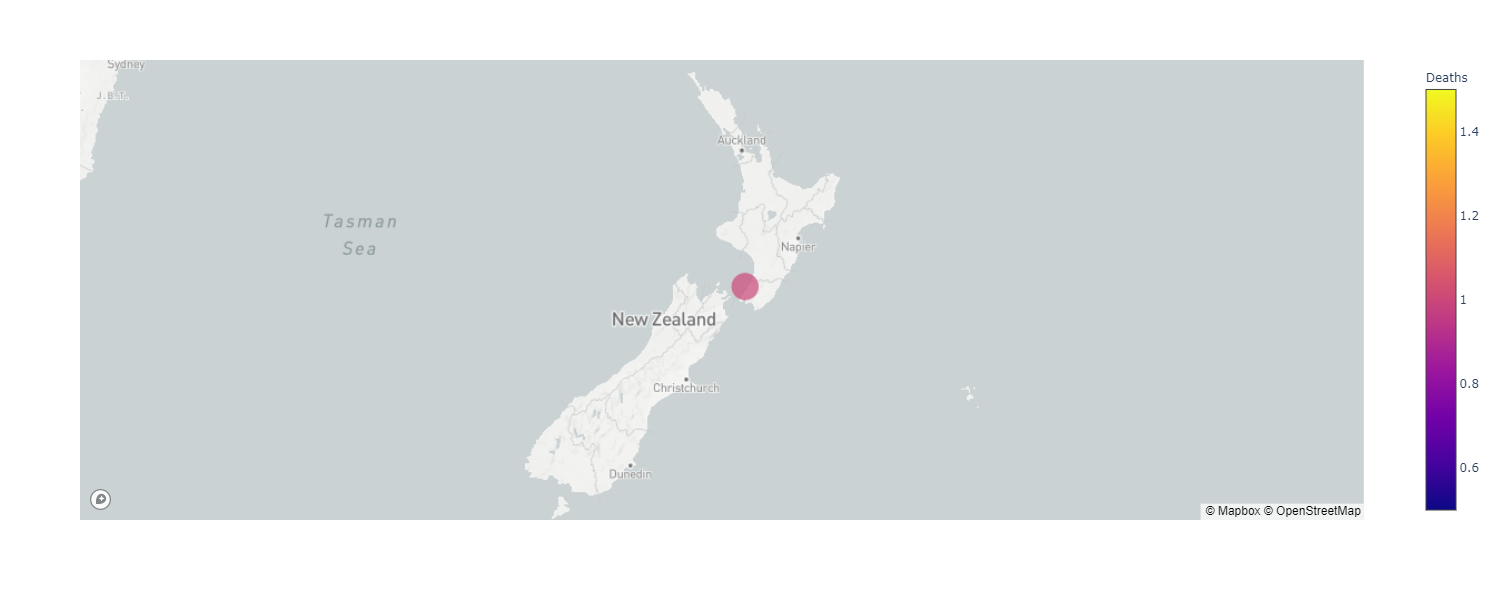

In [47]:
nz_scatter_map_box = px.scatter_mapbox(
    nz_data,
    lat="Lat",
    lon="Long_",
    size="Confirmed",
    color="Deaths",
    hover_name='Admin2',
)


fig = go.Figure(nz_scatter_map_box
)

fig.update_layout(
    mapbox=dict(
        accesstoken=mapbox_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=-41,
            lon=174
        ),
        pitch=0,
        zoom=4.2
    )
)